In [98]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pandas as pd

In [99]:
# Read CSV file into Pandas DataFrame
df = pd.read_csv('../Project-2 Code/climate_data.csv')
df.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [100]:
df = df.rename(columns={"Rainfall for year (in)":"rainfall_for_year", "Average dewpoint (°F)":"avg_dewpoint"})

In [101]:
X = df.avg_dewpoint.values.reshape(-1, 1)
y = df.rainfall_for_year.values.reshape(-1,1)
y

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [4.47],
       [4.47],
       [4.49]])

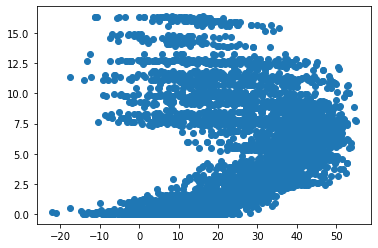

In [102]:
plt.scatter(X,y)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [105]:
X_train_trans = poly.fit_transform(X_train)
X_train_trans

array([[1.00000e+00, 2.89000e+01, 8.35210e+02],
       [1.00000e+00, 1.28000e+01, 1.63840e+02],
       [1.00000e+00, 3.66000e+01, 1.33956e+03],
       ...,
       [1.00000e+00, 3.73000e+01, 1.39129e+03],
       [1.00000e+00, 4.73000e+01, 2.23729e+03],
       [1.00000e+00, 4.38000e+01, 1.91844e+03]])

In [106]:
X_test_trans = poly.transform(X_test)
X_test_trans

array([[ 1.00000e+00,  1.64000e+01,  2.68960e+02],
       [ 1.00000e+00,  1.10000e+01,  1.21000e+02],
       [ 1.00000e+00,  2.19000e+01,  4.79610e+02],
       ...,
       [ 1.00000e+00,  4.33000e+01,  1.87489e+03],
       [ 1.00000e+00,  4.39000e+01,  1.92721e+03],
       [ 1.00000e+00, -9.40000e+00,  8.83600e+01]])

In [107]:
model = LinearRegression()
model.fit(X_train_trans, y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test_trans)
y_pred

array([[5.09624437],
       [4.80576357],
       [5.40996933],
       [7.43090962],
       [5.31107474],
       [4.61676396],
       [4.5473783 ],
       [5.37486868],
       [4.68731778],
       [4.48883462],
       [5.84791262],
       [6.55582027],
       [6.75943607],
       [6.91001095],
       [6.40469663],
       [5.37486868],
       [5.61899937],
       [4.99205648],
       [5.4630226 ],
       [3.84132524],
       [5.10178754],
       [5.63116446],
       [5.12401983],
       [4.01740634],
       [4.64685828],
       [4.51799918],
       [7.50770768],
       [4.9220097 ],
       [5.11289176],
       [5.97504667],
       [5.31684439],
       [4.8109849 ],
       [4.56708358],
       [6.14388497],
       [4.57202479],
       [4.25868837],
       [6.39110115],
       [7.20409138],
       [7.04851015],
       [5.29955332],
       [4.34156907],
       [5.77277649],
       [6.4936483 ],
       [6.11764761],
       [4.78493782],
       [5.29955332],
       [5.45710395],
       [5.686

In [109]:
print(r2_score(y_test, y_pred))

0.044016974376080875


In [110]:
print(model.coef_)

[[0.         0.04562764 0.000298  ]]


In [111]:
print(model.intercept_)

[4.26780198]


In [112]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new

array([[-3.        ],
       [-2.96984925],
       [-2.93969849],
       [-2.90954774],
       [-2.87939698],
       [-2.84924623],
       [-2.81909548],
       [-2.78894472],
       [-2.75879397],
       [-2.72864322],
       [-2.69849246],
       [-2.66834171],
       [-2.63819095],
       [-2.6080402 ],
       [-2.57788945],
       [-2.54773869],
       [-2.51758794],
       [-2.48743719],
       [-2.45728643],
       [-2.42713568],
       [-2.39698492],
       [-2.36683417],
       [-2.33668342],
       [-2.30653266],
       [-2.27638191],
       [-2.24623116],
       [-2.2160804 ],
       [-2.18592965],
       [-2.15577889],
       [-2.12562814],
       [-2.09547739],
       [-2.06532663],
       [-2.03517588],
       [-2.00502513],
       [-1.97487437],
       [-1.94472362],
       [-1.91457286],
       [-1.88442211],
       [-1.85427136],
       [-1.8241206 ],
       [-1.79396985],
       [-1.7638191 ],
       [-1.73366834],
       [-1.70351759],
       [-1.67336683],
       [-1

In [113]:
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

In [114]:
y_new = model.predict(X_new_poly)
y_new

array([[4.13360103],
       [4.1349231 ],
       [4.13624571],
       [4.13756886],
       [4.13889256],
       [4.1402168 ],
       [4.14154157],
       [4.14286689],
       [4.14419276],
       [4.14551916],
       [4.14684611],
       [4.14817359],
       [4.14950162],
       [4.1508302 ],
       [4.15215931],
       [4.15348896],
       [4.15481916],
       [4.1561499 ],
       [4.15748118],
       [4.158813  ],
       [4.16014536],
       [4.16147827],
       [4.16281172],
       [4.16414571],
       [4.16548024],
       [4.16681531],
       [4.16815093],
       [4.16948708],
       [4.17082378],
       [4.17216102],
       [4.1734988 ],
       [4.17483713],
       [4.17617599],
       [4.1775154 ],
       [4.17885535],
       [4.18019584],
       [4.18153687],
       [4.18287844],
       [4.18422056],
       [4.18556322],
       [4.18690642],
       [4.18825016],
       [4.18959444],
       [4.19093927],
       [4.19228464],
       [4.19363054],
       [4.194977  ],
       [4.196

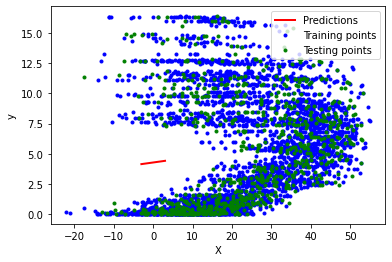

In [115]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [124]:
def polynomial_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

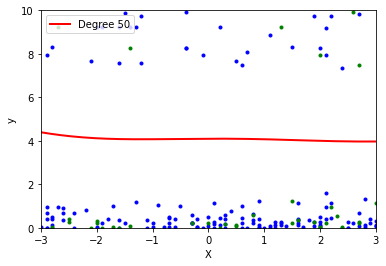

In [125]:
polynomial_regression(50)